# Census Income Machine Learning Project
### Erik Van Slyke

#### import dataset

In [1]:
import pandas as pd
df = pd.read_csv('adult.data',na_values=[' ?'])
print(df.head())
print('\nDimensions of data frame:', df.shape)

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

This is a dataset containing census information on adults including income and other related attributes. The
dataset can be found at: https://archive.ics.uci.edu/ml/datasets/Adult

# Data Cleaning

#### Give dataset columnnames and drop N/A rows

In [2]:
df.columns = ['age','class','fnlwgt','education','eduNum','marital-status','ocupation','relationship','race','sex','capitalGain','capitalLoss','hours','nativeCountry','income']
df.describe()
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (30161, 15)


#### Convert columns to categorical data type

In [3]:
df["class"] = df["class"].astype('category')
df["education"] = df["education"].astype('category')
df["marital-status"] = df["marital-status"].astype('category')
df["ocupation"] = df["ocupation"].astype('category')
df["relationship"] = df["relationship"].astype('category')
df["race"] = df["race"].astype('category')
df["sex"] = df["sex"].astype('category')
df["nativeCountry"] = df["nativeCountry"].astype('category')
df["income"] = df["income"].astype('category')
print(df.dtypes)

age                  int64
class             category
fnlwgt               int64
education         category
eduNum               int64
marital-status    category
ocupation         category
relationship      category
race              category
sex               category
capitalGain          int64
capitalLoss          int64
hours                int64
nativeCountry     category
income            category
dtype: object


# Data Exploration
Here are a few functions that are useful in seeing disparity among classes of people in America.

#### Percentages of Races

In [4]:
print([(race,count/len(df['race'])) for (race,count) in list(zip(df.race.value_counts().index,df.race.value_counts()))])

[(' White', 0.8597858161201551), (' Black', 0.09339875998806406), (' Asian-Pac-Islander', 0.0296740824243228), (' Amer-Indian-Eskimo', 0.009482444216040583), (' Other', 0.007658897251417393)]


#### Odds of a african american person making over 50k

In [5]:
print(len(df[((df['race'].eq(' Black')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' Black'))]))

0.1299254526091587


#### Odds of a white person making over 50k

In [6]:
print(len(df[((df['race'].eq(' White')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' White'))]))

0.2637282122474163


#### Odds of a white male making over 50k

In [7]:
print(len(df[((df['race'].eq(' White')) & (df['sex'].eq(' Male')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' White')) & (df['sex'].eq(' Male'))]))

0.32533126351388814


#### Odds of a african american female making over 50k

In [8]:
print(len(df[((df['race'].eq(' Black')) & (df['sex'].eq(' Female')) & (df['income'].eq(' >50K')))])/len(df[(df['race'].eq(' Black')) & (df['sex'].eq(' Female'))]))

0.06075768406004289


# Data Visualization
From our created plot we can infer which predictors will give us good insight into someone's income. Usually a correlation plot provides good insight into our predictors but because our attributes are mainly categorical it is harder to interpret any correlation especially for attributes with narrow ranges.

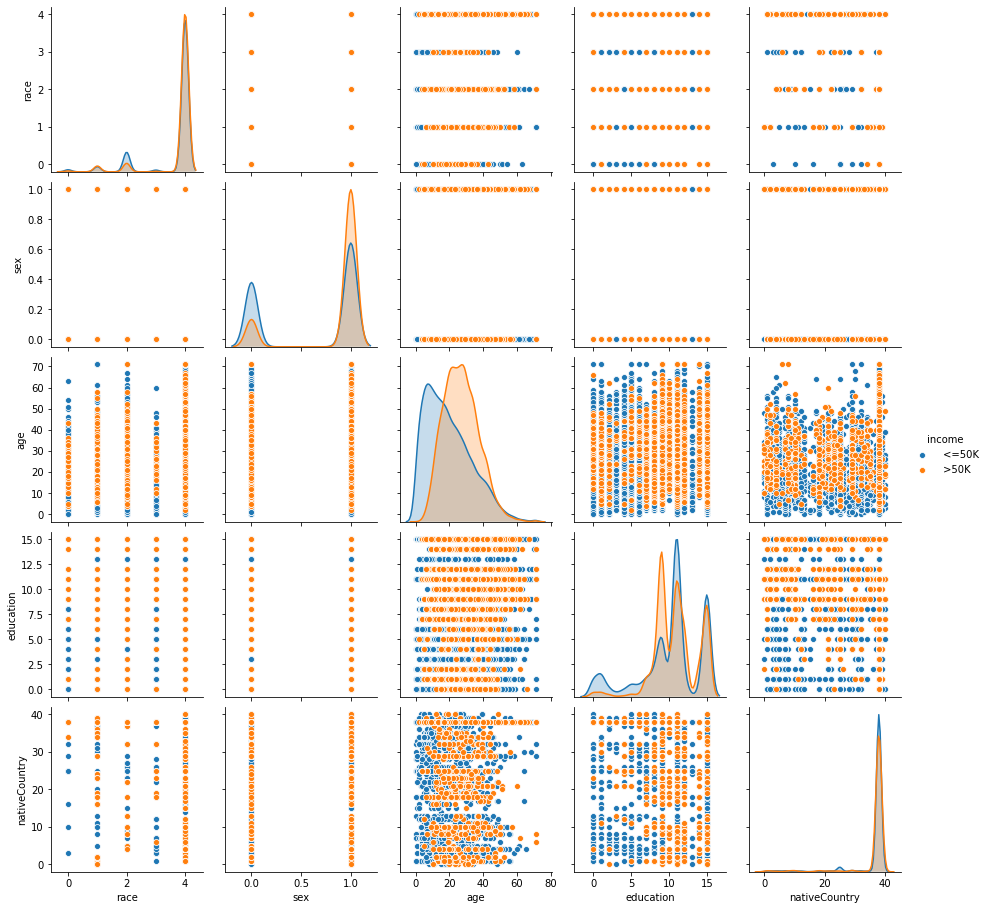

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
#get copy of dataframe so we can get category codes for our correlation plot
corrDF = df.copy()
#correlation plot requires plottable data thats not string named
corrDF['race'] = corrDF['race'].astype("category").cat.codes
corrDF['sex'] = corrDF['sex'].astype("category").cat.codes
corrDF['age'] = corrDF['age'].astype("category").cat.codes
corrDF['education'] = corrDF['education'].astype("category").cat.codes
corrDF['nativeCountry'] = corrDF['nativeCountry'].astype("category").cat.codes
g = sb.pairplot(corrDF,vars=['race','sex','age','education','nativeCountry'], hue="income")

[Text(0, 0.5, 'People'), Text(0.5, 0, 'Sex')]

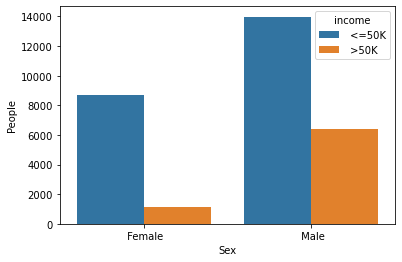

In [10]:
ax = sb.countplot(x='sex', hue="income", data=df)
ax.set(xlabel='Sex', ylabel='People')

[Text(0, 0.5, 'People'), Text(0.5, 0, 'Age')]

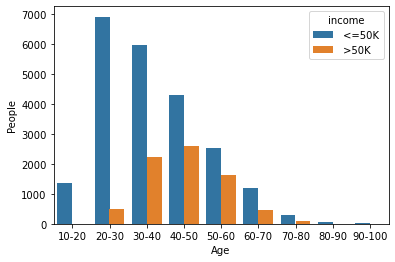

In [11]:
import math

#create new series of age group from converted ages
df['ageGroup'] = [str(math.floor(x/10)*10)+"-"+str((math.floor(x/10)*10)+10) for x in df['age'].tolist()]
#set to category dtype
df["ageGroup"] = df["ageGroup"].astype('category')

#create frquency plot
ax = sb.countplot(x='ageGroup', hue="income", data=df)
ax.set(xlabel='Age', ylabel='People')

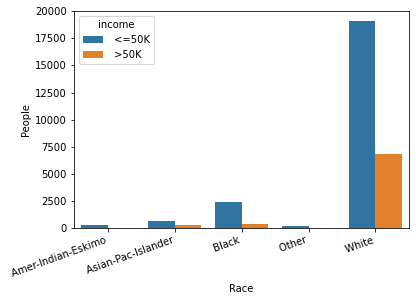

In [12]:
ax = sb.countplot(x='race', hue="income", data=df)
#rotate tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set(xlabel='Race', ylabel='People')
plt.show()

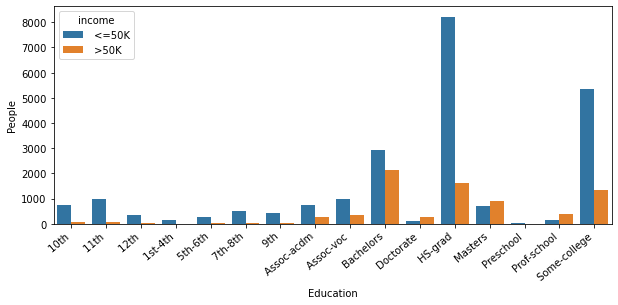

In [13]:
#resize table to fit tick labels
plt.figure(figsize=(10,4))
ax = sb.countplot(x='education', hue="income", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Education', ylabel='People')
plt.show()

# Machine Learning Algorithms

#### Convert predictors to trainable data and split into test and train sets

In [14]:
from sklearn.model_selection import train_test_split
df['race'] = df['race'].astype("category").cat.codes
df['sex'] = df['sex'].astype("category").cat.codes
df['age'] = df['age'].astype("category").cat.codes
df['education'] = df['education'].astype("category").cat.codes
df['relationship'] = df['relationship'].astype("category").cat.codes
X = df.loc[:,['education','age','race','sex','relationship']]
y = df.loc[:,['income']]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=123)
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (24128, 5)
test size: (6033, 5)


#### Perform algorithms on test data and save metrics

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = [
    ('LogReg', LogisticRegression()),
    ('NaiveB', MultinomialNB()),
    ('kNN', KNeighborsClassifier(n_neighbors=5)),
    ('DTree', DecisionTreeClassifier()),
    ('RForest',RandomForestClassifier(n_estimators=100, bootstrap = True))
]

clf_acc = {}
clf_precision = {}
clf_recall = {}
clf_f1 = {}

print('Confusion Matrices:')
for (clf, model) in models:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    print(clf+':\n',confusion_matrix(y_test, y_pred))
    clf_acc[clf] = accuracy_score(y_test, y_pred)
    clf_precision[clf] = precision_score(y_test, y_pred, pos_label=' >50K')
    clf_recall[clf] = recall_score(y_test, y_pred, pos_label=' >50K')
    clf_f1[clf] = f1_score(y_test, y_pred, pos_label=' >50K')

Confusion Matrices:
LogReg:
 [[4354  208]
 [1289  182]]
NaiveB:
 [[3506 1056]
 [ 689  782]]
kNN:
 [[4064  498]
 [ 704  767]]
DTree:
 [[4115  447]
 [ 672  799]]
RForest:
 [[4098  464]
 [ 645  826]]


#### Print Metrics for each algorithm

In [16]:
for clf in clf_acc:
    print(clf, 'Acc:\t', clf_acc[clf])
print()
for clf in clf_precision:
    print(clf, 'Prec:\t', clf_precision[clf])
print()
for clf in clf_recall:
    print(clf, 'Recall:\t', clf_recall[clf])
print()
for clf in clf_f1:
    print(clf, 'F1:   \t', clf_f1[clf])

LogReg Acc:	 0.7518647439085032
NaiveB Acc:	 0.7107575004143876
kNN Acc:	 0.8007624730648102
DTree Acc:	 0.8145201392342118
RForest Acc:	 0.8161776893751036

LogReg Prec:	 0.4666666666666667
NaiveB Prec:	 0.42546245919477693
kNN Prec:	 0.6063241106719368
DTree Prec:	 0.6412520064205457
RForest Prec:	 0.6403100775193798

LogReg Recall:	 0.12372535690006799
NaiveB Recall:	 0.5316111488783141
kNN Recall:	 0.521414004078858
DTree Recall:	 0.5431679129843644
RForest Recall:	 0.5615227736233854

LogReg F1:   	 0.1955937667920473
NaiveB F1:   	 0.47265034753702023
kNN F1:   	 0.5606725146198831
DTree F1:   	 0.5881486934118514
RForest F1:   	 0.5983339369793553


# Results Analysis
The algorithm that scored the best as seen below was Random Forest. This makes since due to it being an ensemble method as it gets to aggregate the best performing trees it generates. As we can see it did not perform that much better even though it generated 100 random Decision Trees.

The runner up algorithm the performed similar to Random Forest was Decision Tree. Most of our predictors fed into our models were categorical data which Decision Tree was able to easily create accurate branches on.

Our next best algorithm was kNN which usually performs well on train data, but for this particular set of data was somewhat suprising. Since the predictors we selected had small range of categorical values. Besides this limited input kNN was still able to group targets together very well.

Logistic Regression and NaiveBayes performed significantly worse than the other two.

In [17]:
print('Best Model Accuracy Score:\t',max([(score,clf) for (clf,score) in clf_acc.items()])[1])
print('Best Model Pecision Score:\t',max([(score,clf) for (clf,score) in clf_precision.items()])[1])
print('Best Model Recall Score:  \t',max([(score,clf) for (clf,score) in clf_recall.items()])[1])
print('Best Model F1 Score:      \t',max([(score,clf) for (clf,score) in clf_f1.items()])[1])

Best Model Accuracy Score:	 RForest
Best Model Pecision Score:	 DTree
Best Model Recall Score:  	 RForest
Best Model F1 Score:      	 RForest
